# 🏡 Min-Max Normalization Workshop
## Team Name: 6
## Team Members: Paula Ramirez
---

## ❗ Why We Normalize: The Problem with Raw Feature Scales

In housing data, features like `Price` and `Lot_Size` can have values in the hundreds of thousands, while others like `Num_Bedrooms` range from 1 to 5. This creates problems when we use algorithms that depend on numeric magnitudes.

---

### ⚠️ What Goes Wrong Without Normalization

---

### 1. 🧭 K-Nearest Neighbors (KNN)

KNN uses the **Euclidean distance** formula:

$$
d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + \cdots}
$$

**Example:**

- $ \text{Price}_1 = 650{,}000, \quad \text{Price}_2 = 250{,}000 $
- $ \text{Bedrooms}_1 = 3, \quad \text{Bedrooms}_2 = 2 $

Now compute squared differences:

$$
(\text{Price}_1 - \text{Price}_2)^2 = (650{,}000 - 250{,}000)^2 = (400{,}000)^2 = 1.6 \times 10^{11}
$$
$$
(\text{Bedrooms}_1 - \text{Bedrooms}_2)^2 = (3 - 2)^2 = 1
$$

➡️ **Price dominates the distance calculation**, making smaller features like `Bedrooms` irrelevant.

---

### 2. 📉 Linear Regression

Linear regression estimates:

$$
y = \beta_1 \cdot \text{Price} + \beta_2 \cdot \text{Bedrooms} + \beta_3 \cdot \text{Lot\_Size} + \epsilon
$$

If `Price` has very large values:
- Gradient updates for $ \beta_1 $ will be **much larger**
- Gradient updates for $ \beta_2 $ (Bedrooms) will be **very small**

➡️ The model overfits high-magnitude features like `Price`.

---

### 3. 🧠 Neural Networks

A single neuron computes:

$$
z = w_1 \cdot \text{Price} + w_2 \cdot \text{Bedrooms} + w_3 \cdot \text{Lot\_Size}
$$

If:

- $ \text{Price} = 650{,}000 $
- $ \text{Bedrooms} = 3 $
- $ \text{Lot\_Size} = 8{,}000 $

Then:

$$
z \approx w_1 \cdot 650{,}000 + w_2 \cdot 3 + w_3 \cdot 8{,}000
$$

➡️ Even with equal weights, `Price` contributes **most of the activation**, making it difficult for the network to learn from other features.

---

### ✅ Solution: Min-Max Normalization

We apply the transformation:

$$
x_{\text{normalized}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

This scales all features to a common range (typically $[0, 1]$).

| Feature      | Raw Value | Min     | Max     | Normalized Value |
|--------------|-----------|---------|---------|------------------|
| Price        | 650,000   | 250,000 | 800,000 | 0.72             |
| Bedrooms     | 3         | 1       | 5       | 0.50             |
| Lot_Size     | 8,000     | 3,000   | 10,000  | 0.714            |

➡️ Now, **each feature contributes fairly** to model training or distance comparisons.

---

## 📌 Use Case: Housing Data
We are normalizing features from a real estate dataset to prepare it for machine learning analysis.

In [31]:
# 🔢 Load and display dataset
import pandas as pd
df = pd.read_csv('./Data/housing_data.csv')
df.head()

,House_ID,Price,Area_sqft,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size
0,H100000,574507,1462,3,3,2002,4878
1,H100001,479260,1727,2,2,1979,4943
2,H100002,597153,1403,5,2,1952,5595
3,H100003,728454,1646,5,2,1992,9305
4,H100004,464876,853,1,1,1956,7407


### 🔎 Step 1 — Implement Min-Max Normalization on the Housing Dataset

**Data Normalization**

In this section, we perform Min-Max normalization on the following features:

- Area_sqft
- Num_Bedrooms
- Num_Bathrooms
- Lot_Size

We exclude the **Price** column from normalization, as it is the target (dependent) variable and should remain on its original scale to preserve the relationship with the features.

Additionally, we do not include house_id in the normalization process because it is an identifier and not a relevant feature for modeling.
For each feature, we:

Calculate the minimum and maximum values.

Apply the **Min-Max normalization formula**:

***[ X_{\text{normalized}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} ]***

Display a few example transformations to illustrate how the normalization changes the data.

This process ensures all selected features are scaled between 0 and 1, which helps many machine learning algorithms perform better and converge faster

In [32]:
# Columns to normalize (excluding Price, assuming it's the target variable)
columns_to_normalize = ['Area_sqft', 'Num_Bedrooms', 'Num_Bathrooms', 'Lot_Size'] # Exclude our target variable
 
# Apply manual Min-Max Normalization with explanation
for col in columns_to_normalize:
    min_val = df[col].min()
    max_val = df[col].max()
 
    print(f"\n--- Normalizing column: {col} ---")
    print(f"Minimum value: {min_val}")
    print(f"Maximum value: {max_val}")
 
    # Apply the formula
    df[col + '_normalized'] = (df[col] - min_val) / (max_val - min_val)
 
    # Show a few example transformations
    for i in range(3):
        original = df[col].iloc[i]
        normalized = df[col + '_normalized'].iloc[i]
        print(f"Original: {original} ➝ Normalized: {normalized:.4f}")
 
# Display only normalized columns
df[[col + '_normalized' for col in columns_to_normalize]].head()
 


--- Normalizing column: Area_sqft ---
Minimum value: 400
Maximum value: 3763
Original: 1462 ➝ Normalized: 0.3158
Original: 1727 ➝ Normalized: 0.3946
Original: 1403 ➝ Normalized: 0.2982

--- Normalizing column: Num_Bedrooms ---
Minimum value: 1
Maximum value: 5
Original: 3 ➝ Normalized: 0.5000
Original: 2 ➝ Normalized: 0.2500
Original: 5 ➝ Normalized: 1.0000

--- Normalizing column: Num_Bathrooms ---
Minimum value: 1
Maximum value: 3
Original: 3 ➝ Normalized: 1.0000
Original: 2 ➝ Normalized: 0.5000
Original: 2 ➝ Normalized: 0.5000

--- Normalizing column: Lot_Size ---
Minimum value: 1000
Maximum value: 13088
Original: 4878 ➝ Normalized: 0.3208
Original: 4943 ➝ Normalized: 0.3262
Original: 5595 ➝ Normalized: 0.3801


,Area_sqft_normalized,Num_Bedrooms_normalized,Num_Bathrooms_normalized,Lot_Size_normalized
0,0.315789,0.50,1.0,0.320814
1,0.394588,0.25,0.5,0.326191
2,0.298246,1.00,0.5,0.380129
3,0.370503,1.00,0.5,0.687045
4,0.134701,0.00,0.0,0.530030


## **Plotting**

**The graphs below visually compares the original and normalized feature values, illustrating how normalization scales the data to a common range without affecting the data**

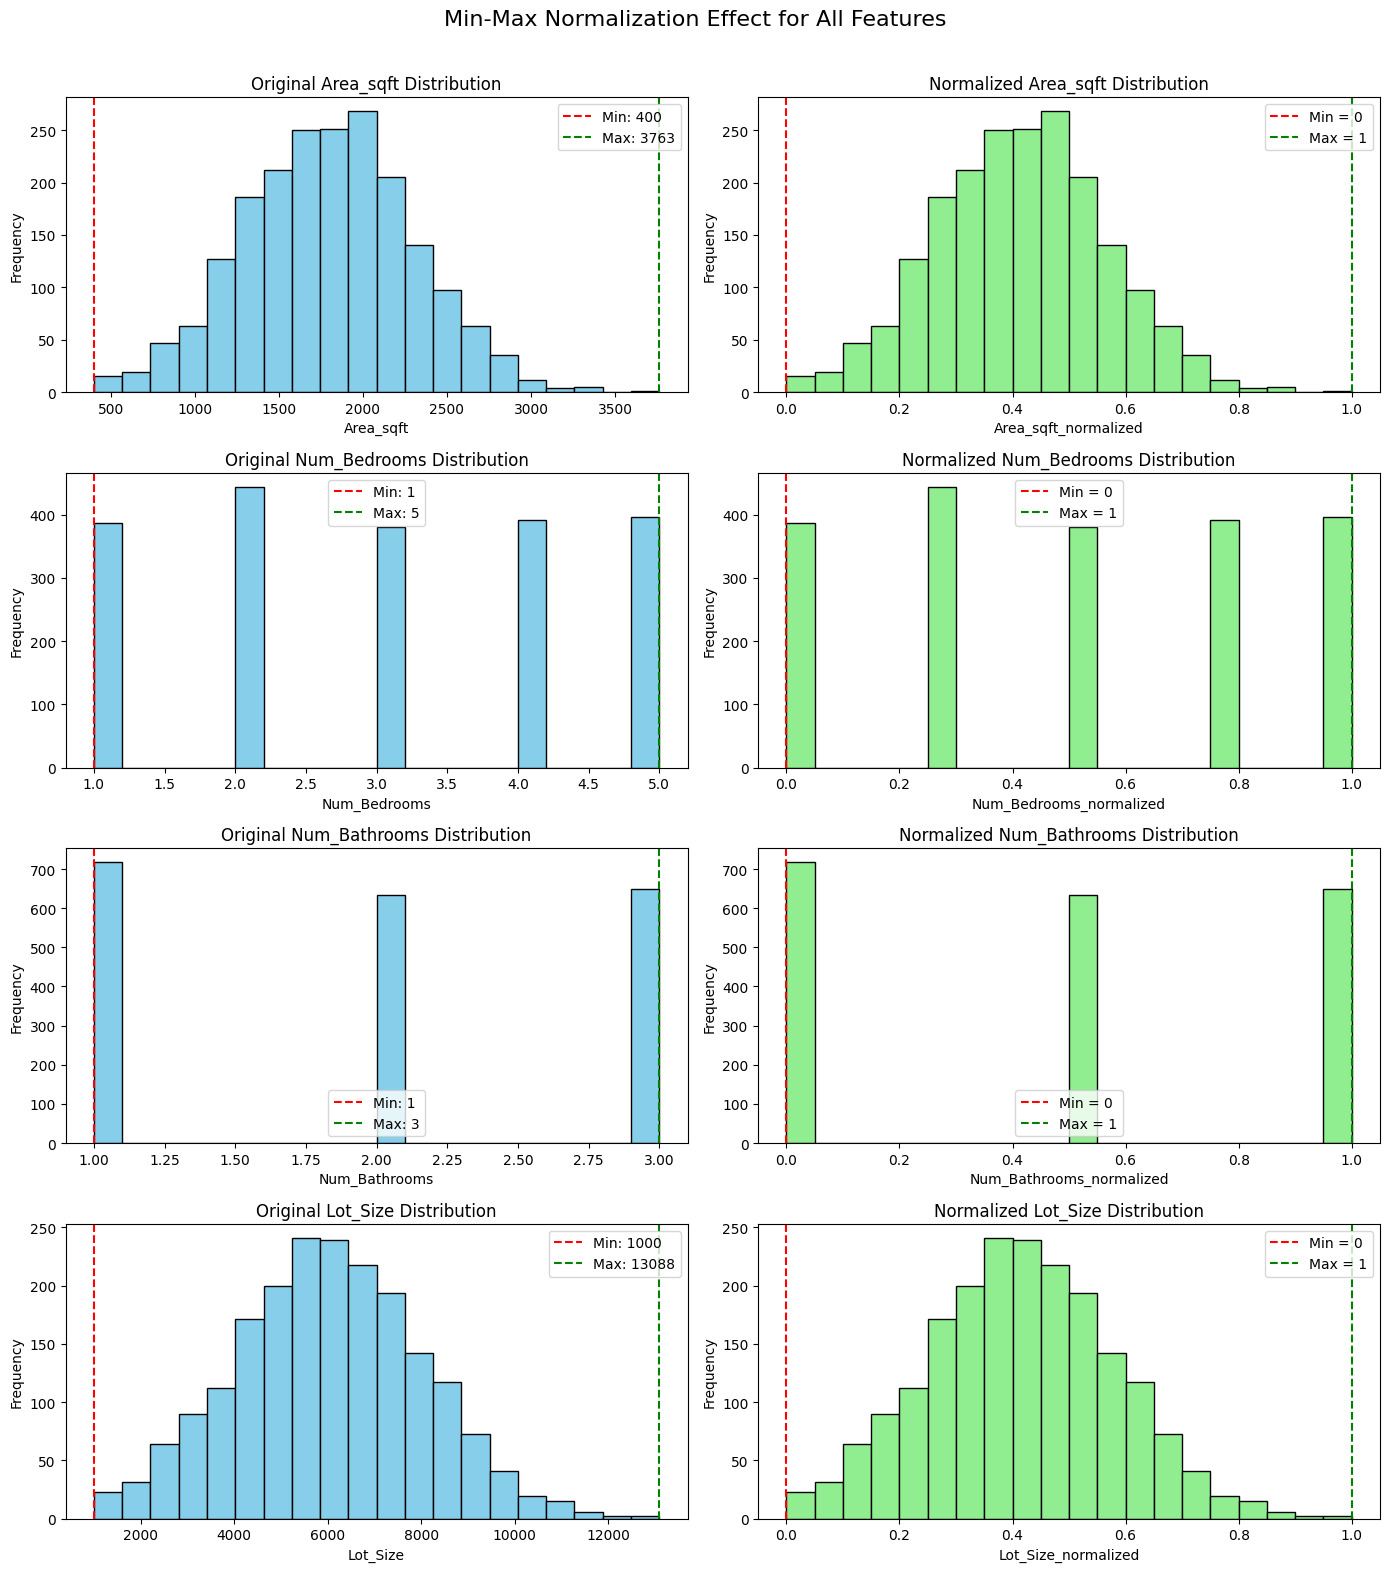

In [24]:
import matplotlib.pyplot as plt
 
# Plot original vs normalized distributions for all features normalized earlier
features = columns_to_normalize  # ['Area_sqft', 'Num_Bedrooms', 'Num_Bathrooms', 'Lot_Size']

fig, axs = plt.subplots(len(features), 2, figsize=(14, 4 * len(features)))

for i, feature in enumerate(features):
    # Original
    axs[i, 0].hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    axs[i, 0].set_title(f'Original {feature} Distribution')
    axs[i, 0].set_xlabel(feature)
    axs[i, 0].set_ylabel('Frequency')
    axs[i, 0].axvline(df[feature].min(), color='red', linestyle='--', label=f'Min: {df[feature].min():.0f}')
    axs[i, 0].axvline(df[feature].max(), color='green', linestyle='--', label=f'Max: {df[feature].max():.0f}')
    axs[i, 0].legend()

    # Normalized
    axs[i, 1].hist(df[feature + '_normalized'], bins=20, color='lightgreen', edgecolor='black')
    axs[i, 1].set_title(f'Normalized {feature} Distribution')
    axs[i, 1].set_xlabel(f'{feature}_normalized')
    axs[i, 1].set_ylabel('Frequency')
    axs[i, 1].axvline(0, color='red', linestyle='--', label='Min = 0')
    axs[i, 1].axvline(1, color='green', linestyle='--', label='Max = 1')
    axs[i, 1].legend()

plt.suptitle('Min-Max Normalization Effect for All Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### 🔎 Talking Point 1 — [Insert your review comment here]

Reviwed by:
- Name
- Name
- Name